This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [29]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [30]:
train_images.shape

(60000, 28, 28)

In [31]:
len(train_labels)

60000

In [32]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [33]:
test_images.shape

(10000, 28, 28)

In [34]:
len(test_labels)

10000

In [35]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [36]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [37]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [38]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [39]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
  1/469 [..............................] - ETA: 5:25 - loss: 2.4023 - accuracy: 0.0312

469/469 [==============================] - 2s 4ms/step - loss: 0.2578 - accuracy: 0.9255
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1052 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0695 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0498 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0374 - accuracy: 0.9886


**Using the model to make predictions**

In [40]:
test_digits = test_images[0:10] # 10 iamges taken
predictions = model.predict(test_digits)
predictions[0]  #1st image probalilities

1/1 [==============================] - 0s 80ms/step


array([6.3024448e-09, 9.7769098e-11, 1.3227201e-06, 5.1872670e-05,
       1.0651504e-11, 5.1910199e-08, 4.5854159e-14, 9.9994636e-01,
       6.3291544e-08, 4.6306255e-07], dtype=float32)

In [41]:
len(test_digits)

10

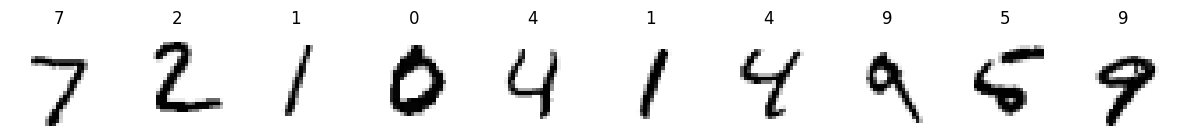

In [42]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(1, 10, figsize=(15, 2))  # Adjust figsize as needed

for idx, img in enumerate(test_digits):
    img_r = img.reshape(28,28)
    axes[idx].imshow(img_r, cmap=plt.cm.binary)
    axes[idx].axis('off')
    pr = np.argmax(predictions[idx])
    axes[idx].set_title(str(pr))
plt.show()


In [43]:
test_labels[0]

7

**Evaluating the model on new data**

In [44]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0639 - accuracy: 0.9809
test_acc: 0.98089998960495


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [45]:
import numpy as np
x = np.array(12)
x

array(12)

In [46]:
x.ndim

0

### Vectors (rank-1 tensors)

In [47]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [48]:
x.ndim

1

### Matrices (rank-2 tensors)

In [49]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [50]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [51]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [52]:
train_images.ndim

3

In [53]:
train_images.shape

(60000, 28, 28)

In [54]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

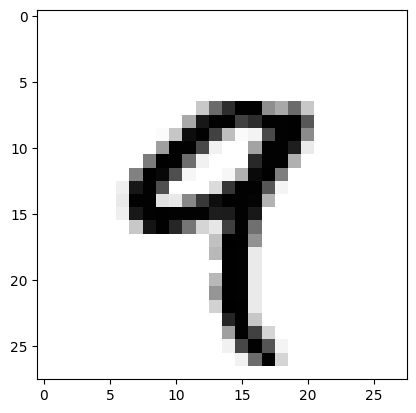

In [55]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [56]:
import matplotlib.pyplot as plt
def show(img):
    plt.imshow(img, cmap=plt.cm.binary)
    plt.show()

In [57]:
train_labels[4]

9

### The notion of data batches

In [58]:
batch = train_images[:128]

In [59]:
batch = train_images[128:256]

In [60]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [61]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [62]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

Vector Operation

In [63]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


non vector approach

In [64]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.00 s


### Broadcasting

In [65]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [66]:
y.shape

(10,)

In [67]:
y = np.expand_dims(y, axis=0)

In [68]:
y.shape

(1, 10)

In [69]:
Y = np.concatenate([y] * 32, axis=0)

In [70]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [71]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

single dimensional vectors (vectorized dot product)

In [72]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

single dim : non-vactorized naive dot product

In [73]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

x is matrix (2 sim), y is vector (1 dim)

In [74]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]  # no. of columns in x must equal no. of rows in y
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

Using above function

In [75]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

now defining function for naive dot procuct of 2 matrices (both 2 dim)

In [76]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [77]:
train_images = train_images.reshape((60000, 28 * 28))